# Task 2 as Movie rating Prediction of CodSoft Internship Program

In [866]:
!pip install missingno

In [867]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msg

In [868]:
#loading dat
df=pd.read_csv('movie.csv',encoding='latin')

In [869]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [870]:
df.sample(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
309,Aaj Ki Biwi,(1991),NaN,Drama,NaN,NaN,Ajay Kumar,Vijay Kumar,Jaishree Patel,NaN
8071,Laila Majnu,(1953),132 min,Romance,8.0,25,K. Amarnath,Shammi Kapoor,Nutan,Ulhas
12740,Shaandaar,(2015),144 min,"Comedy, Drama, Romance",3.5,"5,250",Vikas Bahl,Shahid Kapoor,Alia Bhatt,Pankaj Kapur
6727,Jhumka,(1996),NaN,Romance,NaN,NaN,Michael Chinappa,Bhavana Prasad,Satish Rai,Suneeta Sethi
14882,Vikram,(1991),NaN,Action,5.3,9,Nagarjuna Akkineni,Gautami,Girish Karnad,Raghuvaran


In [871]:
df.shape

(15509, 10)

In [872]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [873]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [874]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [875]:
df.duplicated().sum()

6

In [876]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

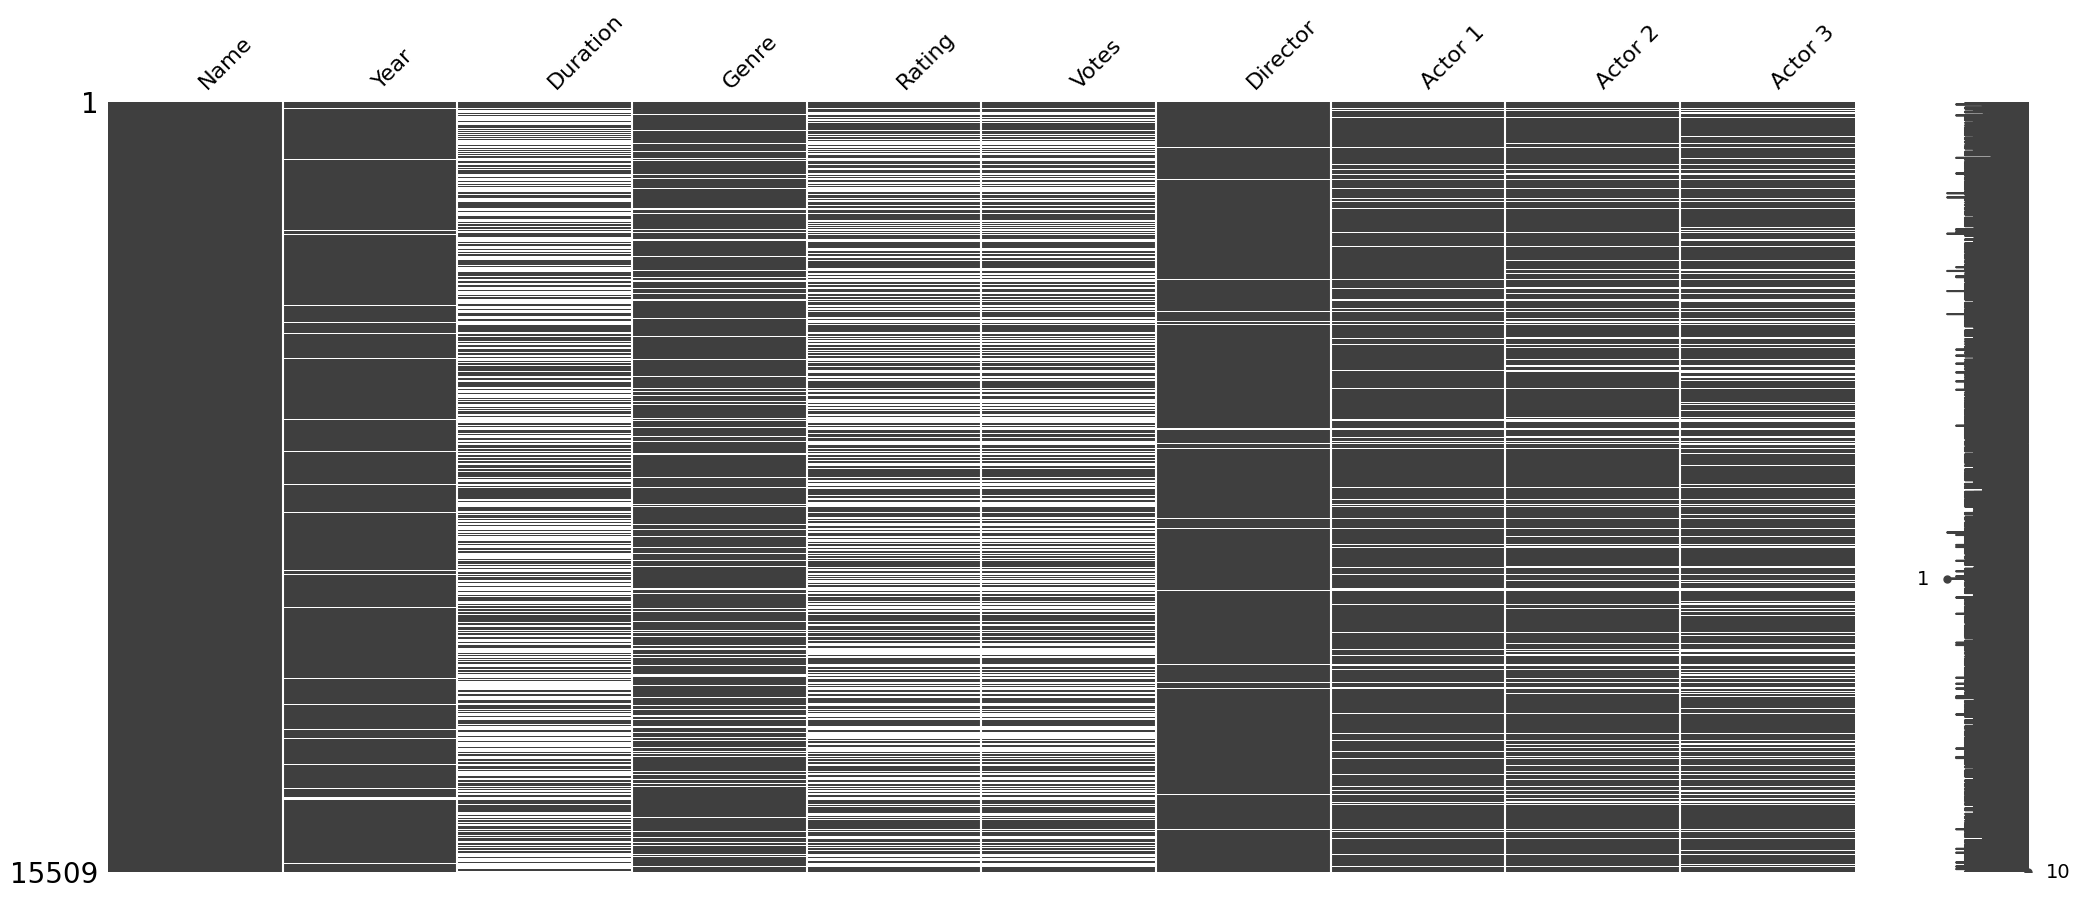

In [877]:
msg.matrix(df)

# feature Engineering

In [878]:
#columns available in data
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [879]:
print(f'Nunber of rows be :{df.shape[0]} \n Number of column be: {df.shape[1]}')

Nunber of rows be :15509 
 Number of column be: 10


In [880]:
df['Name'].duplicated().sum()

1671

In [881]:
df['Duration'].duplicated().sum()

15326

In [882]:
#dropping duplicT
df.drop_duplicates(inplace=True)

In [883]:
df['Year'].duplicated().sum()

15400

In [884]:
#for  null value
df.isnull().sum()/(df.shape[0])
#given thw percentage of null vvalue

Name        0.000000
Year        0.033993
Duration    0.533058
Genre       0.121009
Rating      0.489196
Votes       0.489131
Director    0.033800
Actor 1     0.104173
Actor 2     0.153583
Actor 3     0.202541
dtype: float64

In [885]:
df.dropna(inplace=True)

In [886]:
df.shape

(5659, 10)

In [887]:
#checking null value
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [888]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [889]:
df.reset_index(drop=True)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
5654,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
5655,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
5656,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
5657,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [890]:
import string

In [891]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [892]:
exclude=string.punctuation
def remove_punc(text):
    for char in exclude:
        text=text.replace(char,"")
    return text

In [893]:
df['Name']

1        #Gadhvi (He thought he was Gandhi)
3                                   #Yaaram
5                      ...Aur Pyaar Ho Gaya
6                                 ...Yahaan
8                        ?: A Question Mark
                        ...                
15493                                Zubaan
15494                              Zubeidaa
15503                       Zulm Ki Zanjeer
15505                                 Zulmi
15508                          Zulm-O-Sitam
Name: Name, Length: 5659, dtype: object

In [894]:
df['Name']=df['Name'].apply(remove_punc)

In [895]:
df['Name'][1]=df['Name'][1][:6]

C:\Users\Acer\AppData\Local\Temp\ipykernel_4092\3348995699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'][1]=df['Name'][1][:6]


In [896]:
df['Name'].str.len().mean()

12.518466160098958

In [897]:

df['Year']=df['Year'].apply(remove_punc)

In [898]:
df['Duration']=df['Duration'].str[:3]

In [899]:
# df.rename(columns={"Duration":'Duration(mins)'})

In [900]:
df['Genre']

1                            Drama
3                  Comedy, Romance
5           Comedy, Drama, Musical
6              Drama, Romance, War
8        Horror, Mystery, Thriller
                   ...            
15493                        Drama
15494    Biography, Drama, History
15503         Action, Crime, Drama
15505                Action, Drama
15508                Action, Drama
Name: Genre, Length: 5659, dtype: object

In [901]:
def in_list(data):
#     
    listed_val=[]
    for word in data.split(" "):
        listed_val.append(word)

    modified_list = [item.replace(',', '', 1) for item in listed_val]

    return modified_list

In [902]:
# df['Genre']=df['Genre'].apply(in_list)

In [903]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [904]:
def merge_actor(row):
#    
    return ', '.join([str(row['Actor 1']), str(row['Actor 2']), str(row['Actor 3'])])


In [905]:
df['Actor']=df.apply(merge_actor,axis=1)

In [906]:
df=df.drop(['Actor 1','Actor 2','Actor 3'],axis=1)


In [907]:

# df['Actor']=df['Actor'].apply(in_list)

#visualization 

In [908]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,"Prateik, Ishita Raj, Siddhant Kapoor"
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"
6,Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma"
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,"Yash Dave, Muntazir Ahmad, Kiran Bhatia"
...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,"Vicky Kaushal, Sarah Jane Dias, Raaghavv Chanana"
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,"Karisma Kapoor, Rekha, Manoj Bajpayee"
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,"Chiranjeevi, Jayamalini, Rajinikanth"
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,"Akshay Kumar, Twinkle Khanna, Aruna Irani"


### top 10 best rating with name ,year,duration,genre

In [909]:
df['Rating']

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64

In [910]:
# Find the top 10 movies with the best ratings
top_10_movies = df.nlargest(10, 'Rating')
top_10_movies.drop(['Votes','Director','Actor'],axis=1)

,Name,Year,Duration,Genre,Rating
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0
5410,Half Songs,2021,79,"Music, Romance",9.7
5077,Gho Gho Rani,2019,105,"History, Romance",9.4
6852,June,2021,93,Drama,9.4
14222,The Reluctant Crime,2020,113,Drama,9.4
1314,Ashok Vatika,2018,97,Drama,9.3
1729,Baikunth,2021,72,Family,9.3
5125,God of gods,2019,90,Documentary,9.3
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3
11843,Refl3ct,2021,65,Sci-Fi,9.3


<Axes: >

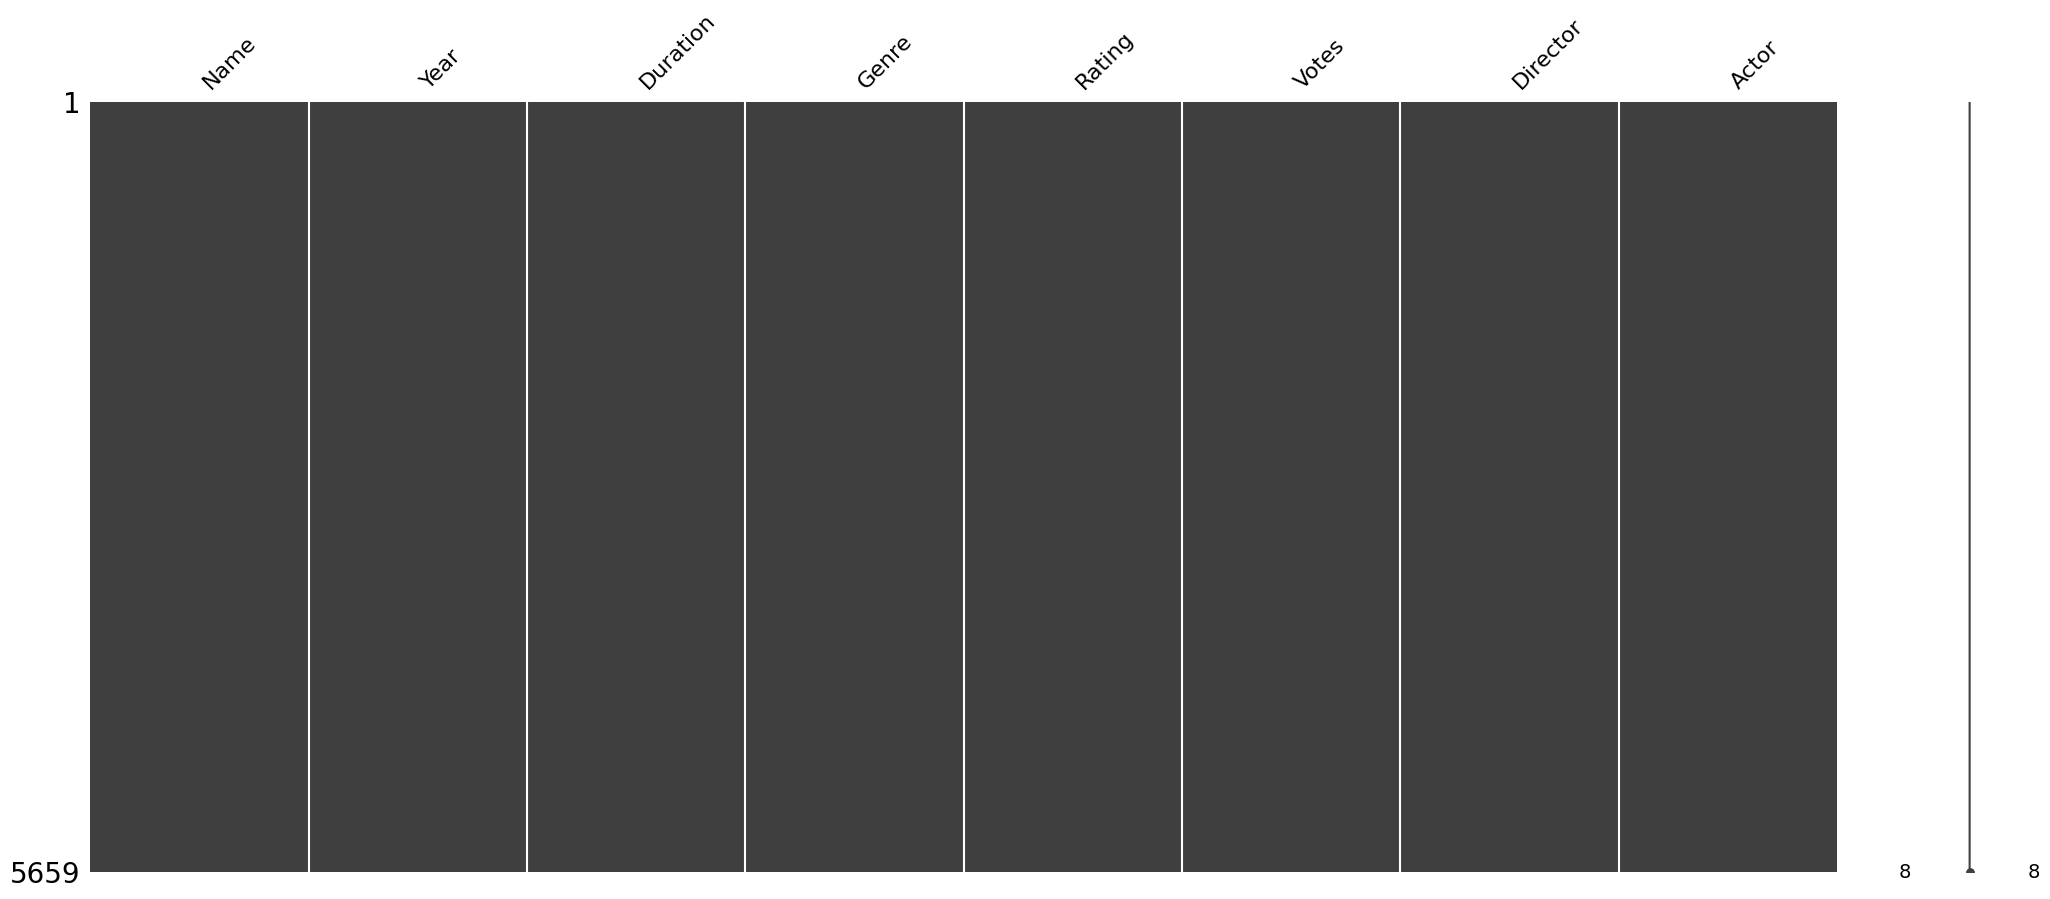

In [911]:
msg.matrix(df)

In [912]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor       0
dtype: int64

# visualization

<Axes: ylabel='Rating'>

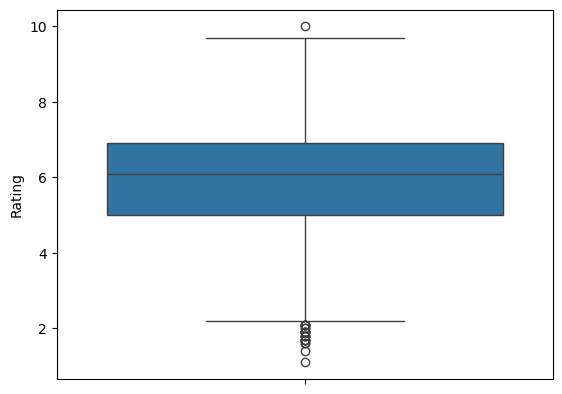

In [913]:
#outlier
sns.boxplot(df['Rating'])

<Axes: xlabel='Rating', ylabel='count'>

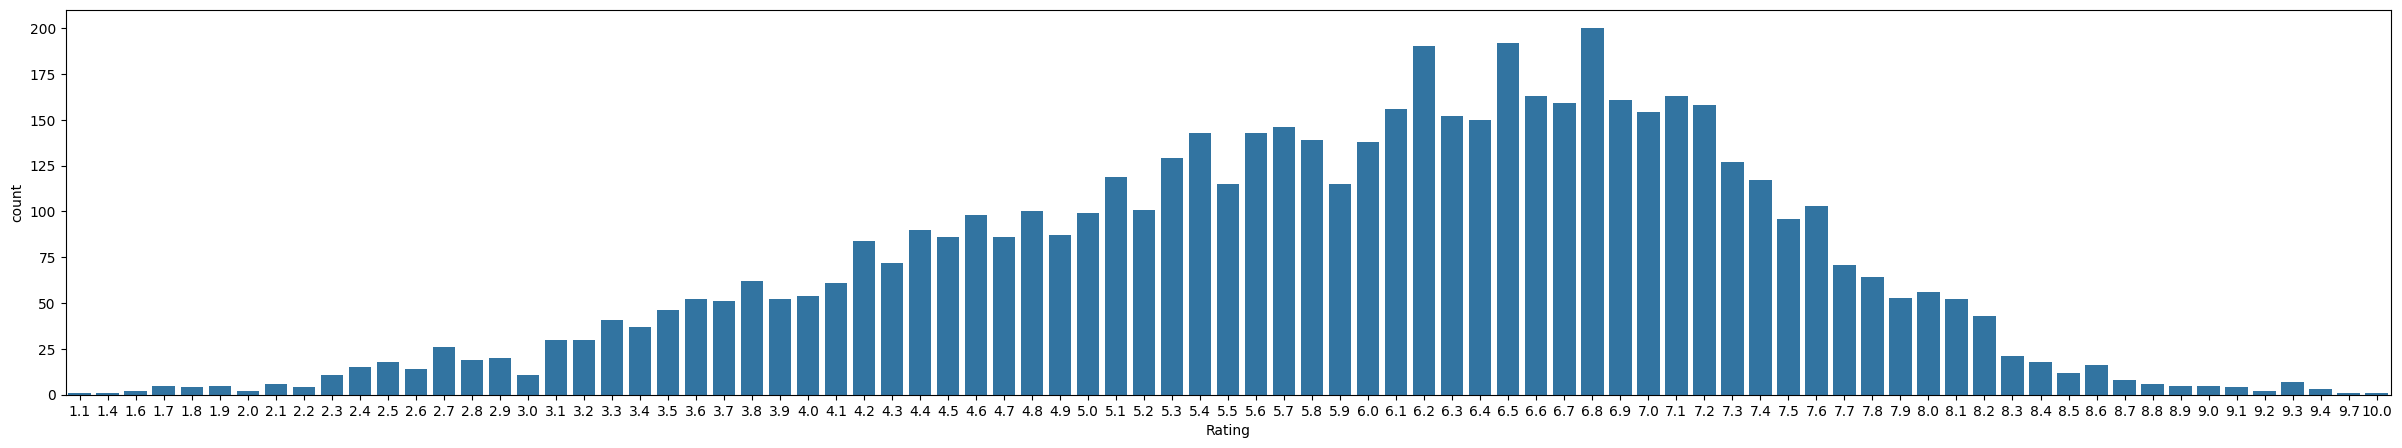

In [914]:
plt.figure(figsize=(30,5))
sns.barplot(df['Rating'].value_counts())

In [915]:
#observation:6.8 is highest rating count

<Axes: xlabel='Votes', ylabel='count'>

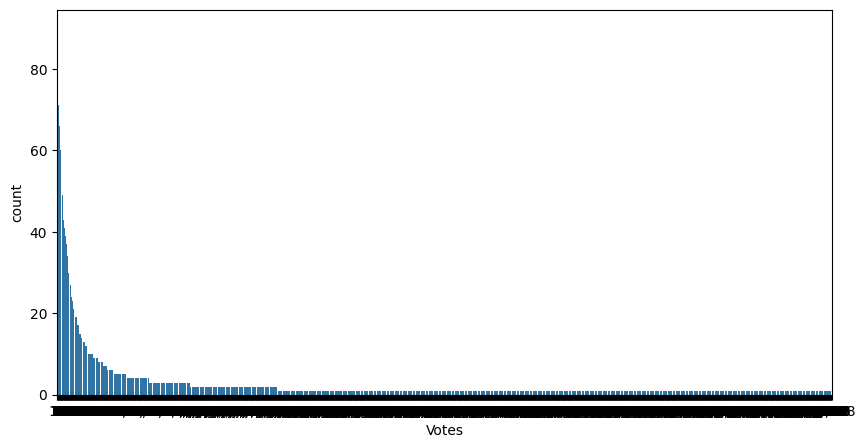

In [916]:
plt.figure(figsize=(10,5))
sns.barplot(df['Votes'].value_counts())

In [917]:
df['Votes']=df['Votes'].sort_values()

In [918]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,"Prateik, Ishita Raj, Siddhant Kapoor"
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"
6,Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma"
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,"Yash Dave, Muntazir Ahmad, Kiran Bhatia"
...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,"Vicky Kaushal, Sarah Jane Dias, Raaghavv Chanana"
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,"Karisma Kapoor, Rekha, Manoj Bajpayee"
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,"Chiranjeevi, Jayamalini, Rajinikanth"
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,"Akshay Kumar, Twinkle Khanna, Aruna Irani"


In [919]:
df['Year'].unique()

array(['2019', '1997', '2005', '2012', '2014', '2004', '2016', '1991',
       '2018', '2010', '1958', '2021', '2017', '2009', '1993', '2002',
       '2008', '1994', '2007', '2003', '1998', '1979', '1974', '2015',
       '2006', '1981', '2020', '1985', '2013', '2011', '1988', '1987',
       '1999', '1973', '1968', '1982', '1977', '1950', '1969', '1948',
       '1990', '1989', '2001', '2000', '1953', '1978', '1963', '1992',
       '1976', '1984', '1986', '1966', '1975', '1980', '1967', '1970',
       '1952', '1972', '1971', '1964', '1954', '1962', '1957', '1965',
       '1996', '1995', '1956', '1955', '1936', '1983', '1951', '1961',
       '1959', '1949', '1960', '1946', '1940', '1945', '1938', '1941',
       '1942', '1935', '1937', '1947', '1931', '1933', '1943', '1944',
       '1932', '1939', '1934'], dtype=object)

<Axes: ylabel='Year'>

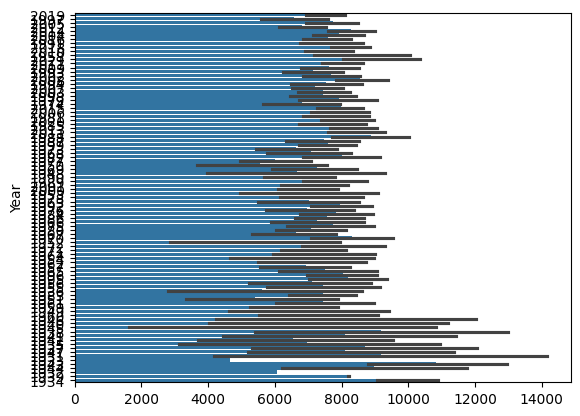

In [920]:
sns.barplot(df['Year'])

# BIVARIATE ANALYSIS

# numerical vs numerical

In [921]:
df['Year']=df['Year'].astype(int)

In [922]:
df['Year'].dtype

dtype('int32')

<Axes: xlabel='Year', ylabel='Rating'>

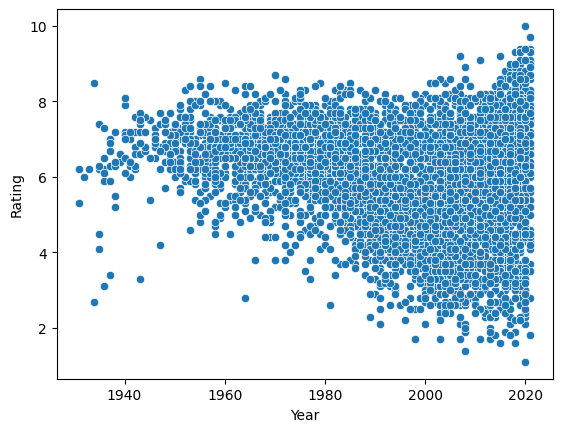

In [923]:
sns.scatterplot(data=df,x="Year",y='Rating')

In [924]:
df['Votes'].duplicated().sum()

3632

In [925]:
# plt.figure(figsize=(10,30))
# sns.scatterplot(data=df,x="Year",y='Votes')

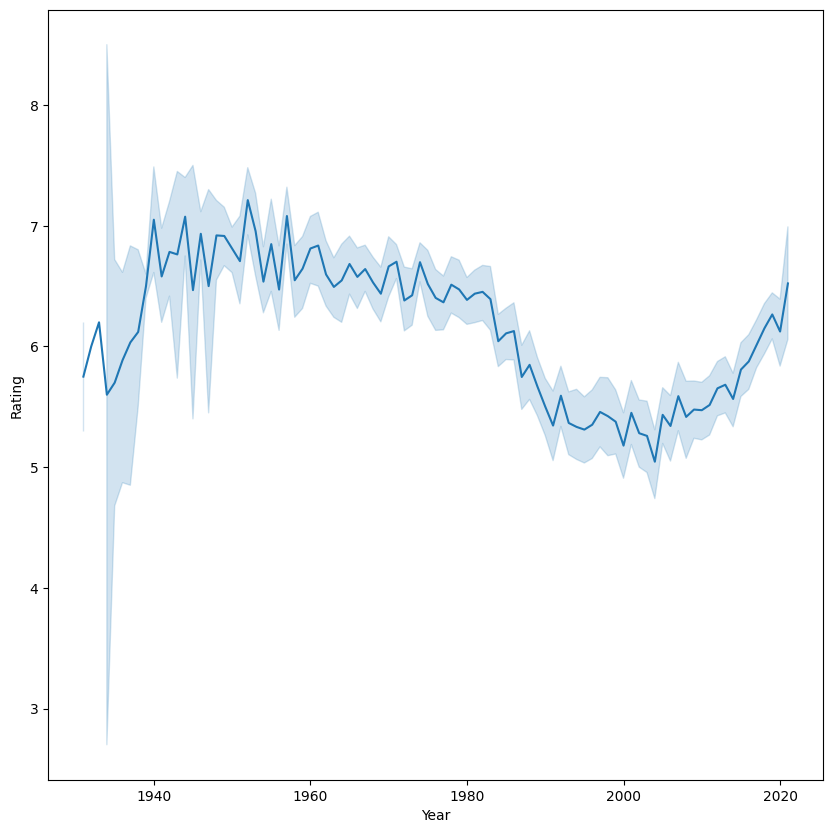

In [926]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,x='Year',y='Rating')
plt.show()

In [927]:
df['Duration']=df['Duration'].astype(int)

In [928]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,"Prateik, Ishita Raj, Siddhant Kapoor"
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"
6,Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma"
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,"Yash Dave, Muntazir Ahmad, Kiran Bhatia"
...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,"Vicky Kaushal, Sarah Jane Dias, Raaghavv Chanana"
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,"Karisma Kapoor, Rekha, Manoj Bajpayee"
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,"Chiranjeevi, Jayamalini, Rajinikanth"
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,"Akshay Kumar, Twinkle Khanna, Aruna Irani"


In [929]:
df=df[df['Year']>1990]

In [930]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,"Prateik, Ishita Raj, Siddhant Kapoor"
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"
6,Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma"
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,"Yash Dave, Muntazir Ahmad, Kiran Bhatia"
...,...,...,...,...,...,...,...,...
15490,Zor Never Underestimate the Force,1998,157,"Action, Drama, Thriller",4.3,268,Sangeeth Sivan,"Sunny Deol, Sushmita Sen, Milind Gunaji"
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,"Vicky Kaushal, Sarah Jane Dias, Raaghavv Chanana"
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,"Karisma Kapoor, Rekha, Manoj Bajpayee"
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,"Akshay Kumar, Twinkle Khanna, Aruna Irani"


In [931]:
df['Year'].tail()

15490    1998
15493    2015
15494    2001
15505    1999
15508    1998
Name: Year, dtype: int32

In [932]:
df['Votes']=df['Votes'].apply(remove_punc)

C:\Users\Acer\AppData\Local\Temp\ipykernel_4092\3156598312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Votes']=df['Votes'].apply(remove_punc)


In [933]:
df['Votes']=df['Votes'].astype(int)

C:\Users\Acer\AppData\Local\Temp\ipykernel_4092\1458122271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Votes']=df['Votes'].astype(int)


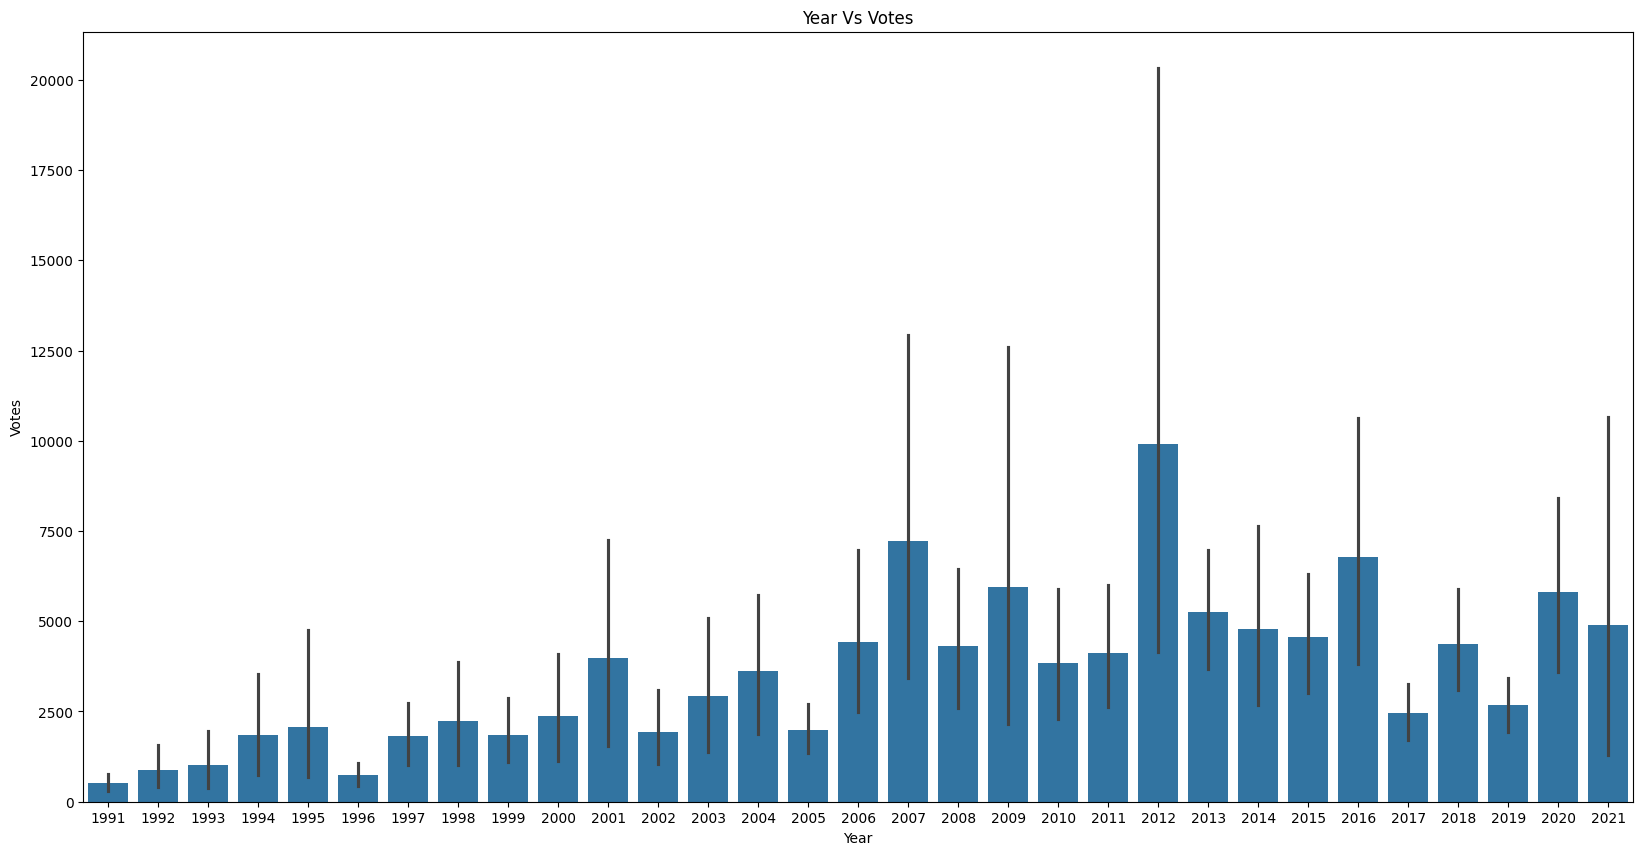

In [934]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year',y='Votes',data=df)
plt.title("Year Vs Votes")
plt.show()

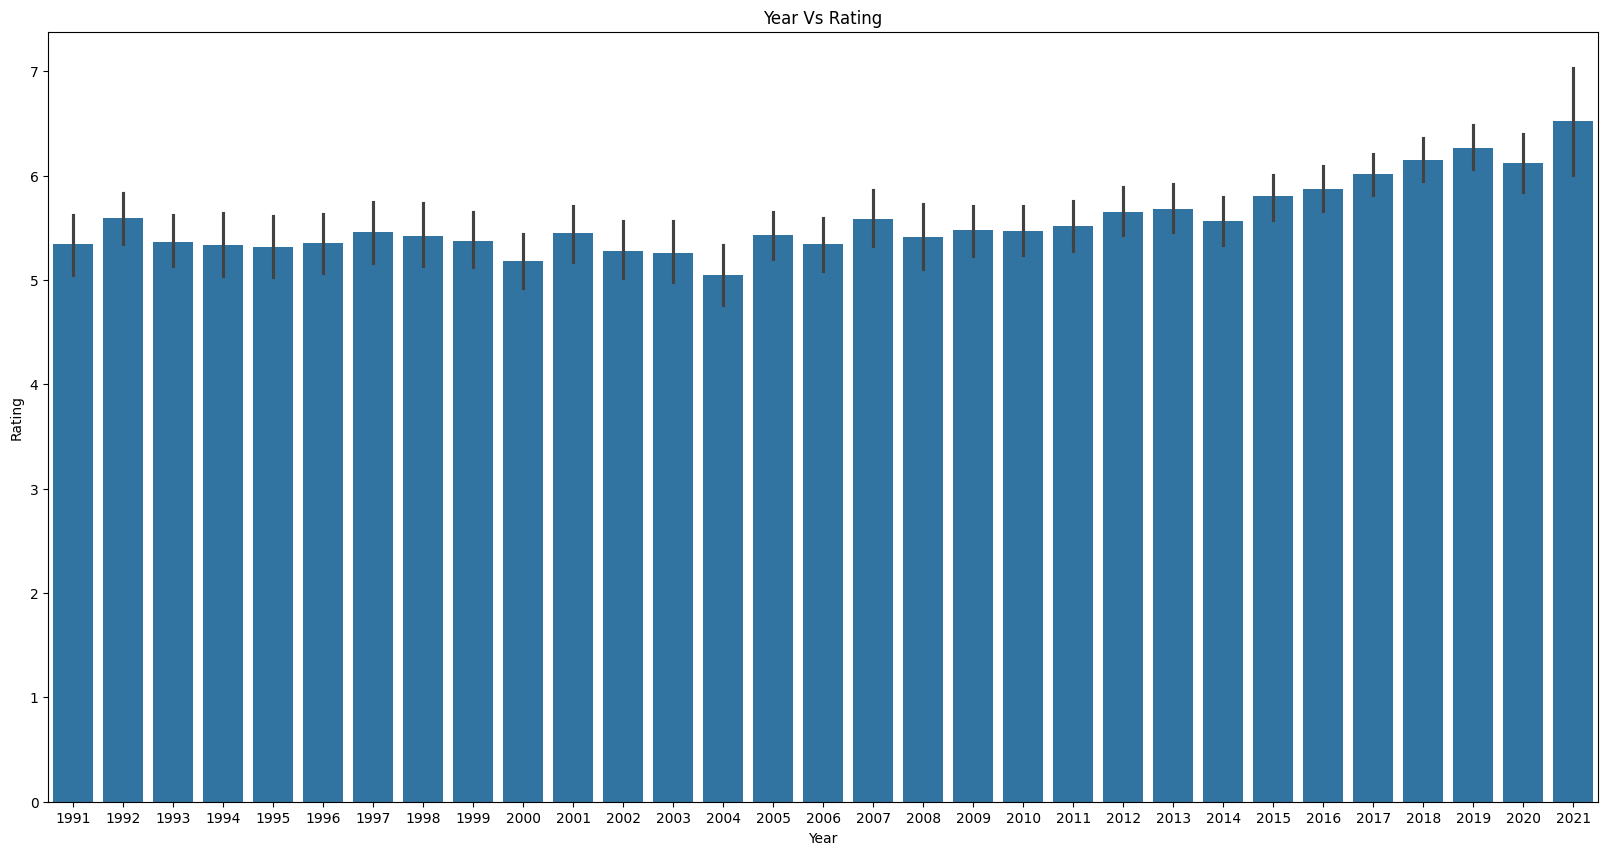

In [935]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year',y='Rating',data=df)
plt.title("Year Vs Rating")
plt.show()

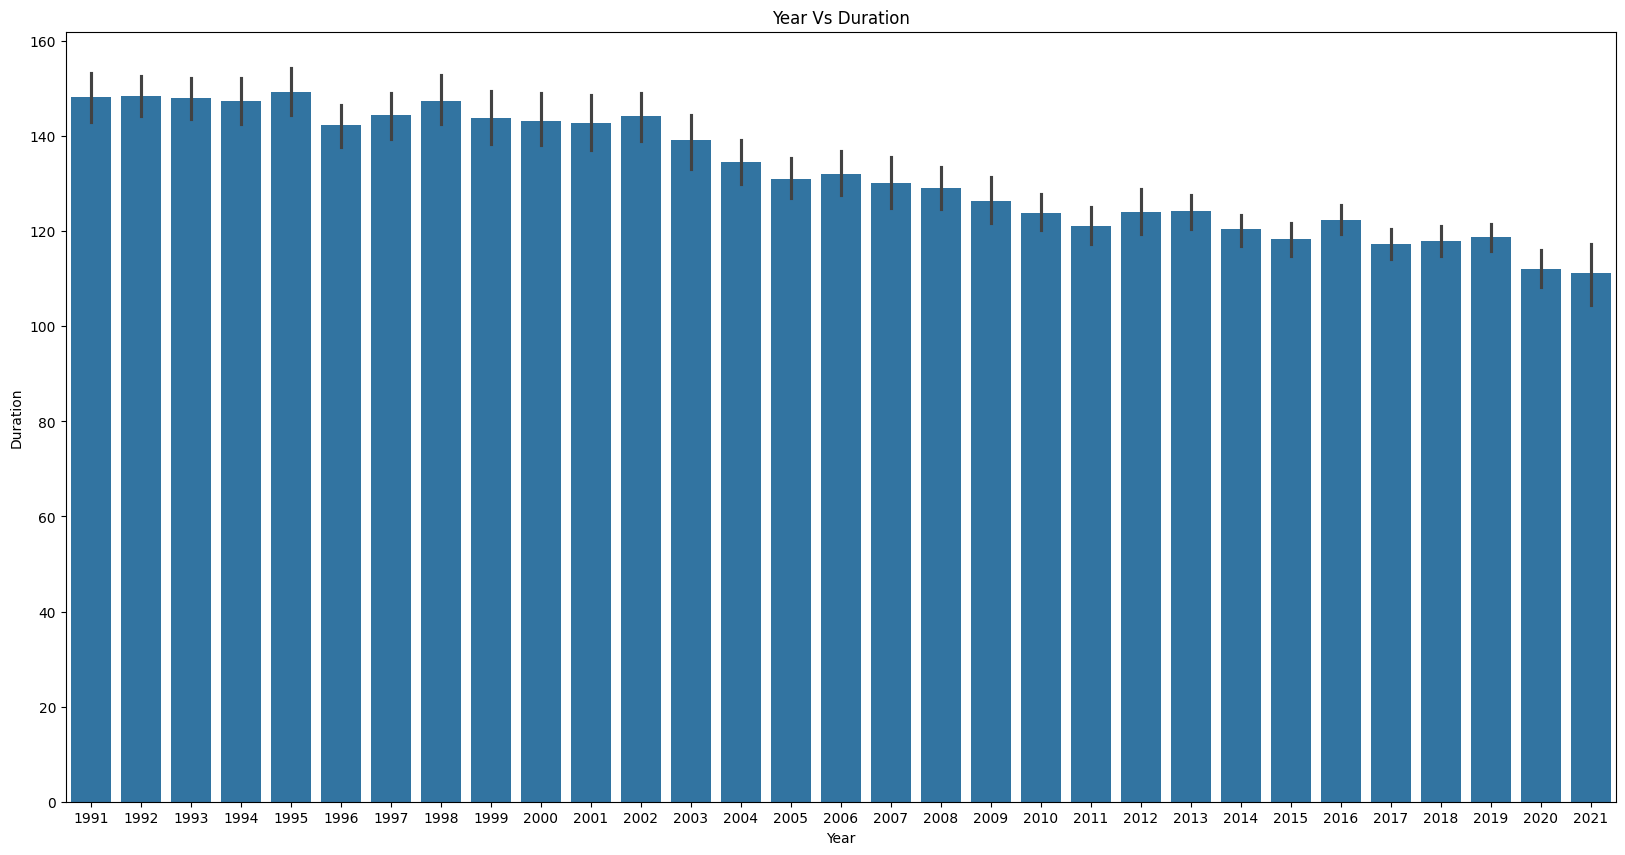

In [936]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year',y='Duration',data=df)
plt.title("Year Vs Duration")
plt.show()

In [937]:
df.reset_index(drop=True)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor
0,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
1,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,"Prateik, Ishita Raj, Siddhant Kapoor"
2,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"
3,Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma"
4,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,"Yash Dave, Muntazir Ahmad, Kiran Bhatia"
...,...,...,...,...,...,...,...,...
3687,Zor Never Underestimate the Force,1998,157,"Action, Drama, Thriller",4.3,268,Sangeeth Sivan,"Sunny Deol, Sushmita Sen, Milind Gunaji"
3688,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,"Vicky Kaushal, Sarah Jane Dias, Raaghavv Chanana"
3689,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,"Karisma Kapoor, Rekha, Manoj Bajpayee"
3690,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,"Akshay Kumar, Twinkle Khanna, Aruna Irani"


# 12. Find The Average Rating For Each Director

In [938]:
df.groupby('Director')['Rating'].mean().sort_values(ascending=False)


Director
Saif Ali Sayeed     10.0
Sriram Raja          9.7
Arvind Pratap        9.4
Munni Pankaj         9.4
Suhrud Godbole       9.4
                    ... 
Umesh Ghadge         1.9
Raajeev Walia        1.8
Stanley D'Costa      1.8
Pramod Mandloi       1.7
Sachindra Sharma     1.6
Name: Rating, Length: 1960, dtype: float64

In [939]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,"Prateik, Ishita Raj, Siddhant Kapoor"
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"
6,Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma"
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,"Yash Dave, Muntazir Ahmad, Kiran Bhatia"
...,...,...,...,...,...,...,...,...
15490,Zor Never Underestimate the Force,1998,157,"Action, Drama, Thriller",4.3,268,Sangeeth Sivan,"Sunny Deol, Sushmita Sen, Milind Gunaji"
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,"Vicky Kaushal, Sarah Jane Dias, Raaghavv Chanana"
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,"Karisma Kapoor, Rekha, Manoj Bajpayee"
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,"Akshay Kumar, Twinkle Khanna, Aruna Irani"


# Display Top 10 Lengthy Movies with name ,year


In [940]:
df['Votes'].mean()

3905.5799024918742

In [941]:
df['Votes'].median()


328.0

<Axes: ylabel='Votes'>

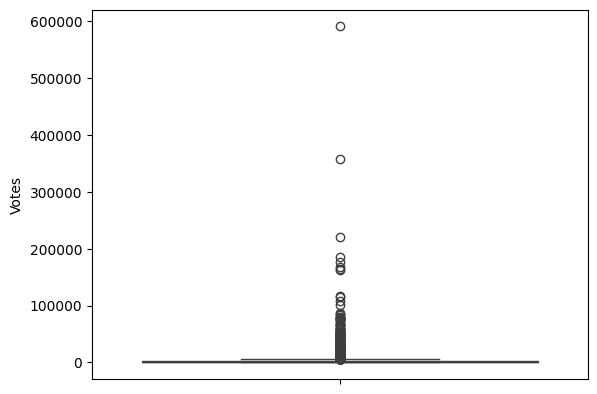

In [942]:
sns.boxplot(df['Votes'])

In [943]:
def remove_outlier(series):
    # Calculate the IQR (Interquartile Range)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    return series[(series >= lower_bound) & (series <= upper_bound)]




In [944]:
# Apply the remove_outlier function to the 'Votes' column
df['Votes'] = remove_outlier(df['Votes'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_4092\2638135219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Votes'] = remove_outlier(df['Votes'])


<Axes: ylabel='Votes'>

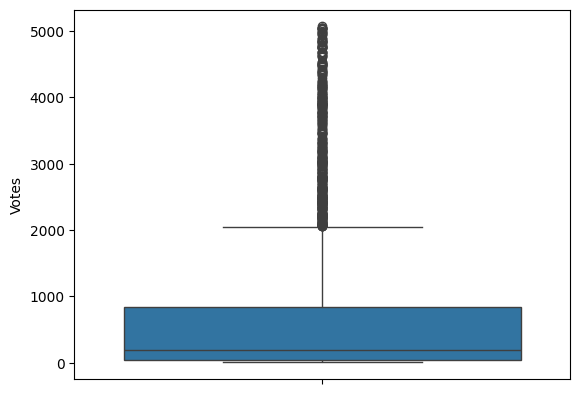

In [945]:
sns.boxplot(df['Votes'])

In [946]:
df['Votes'].isnull().sum()

553

In [947]:
df['Votes'].mean()

706.6747371774451

In [948]:
df['Votes'].median()

195.0

In [949]:
df["Votes"]=df['Votes'].fillna(int(df['Votes'].mean()))

C:\Users\Acer\AppData\Local\Temp\ipykernel_4092\1919274580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Votes"]=df['Votes'].fillna(int(df['Votes'].mean()))


In [950]:
df['Votes'].isnull().sum()

0

In [951]:
df.nlargest(10,'Duration')[['Duration','Name','Year','Votes']]

,Duration,Name,Year,Votes
4902,321,Gangs of Wasseypur,2012,706.0
1345,300,Athidhi,2007,1807.0
8251,255,LOC Kargil,2003,2601.0
14854,250,Vidhyaarthi The Power of Students,2006,12.0
490,240,Aasma The Sky Is the Limit,2009,46.0
14809,240,Veera,1994,571.0
14938,240,Vivekananda,1998,144.0
13713,235,Taj Mahal A Monument of Love,2003,51.0
8035,224,Lagaan Once Upon a Time in India,2001,706.0
9460,216,Mohabbatein,2000,706.0


# Display Number of Movies Per Year

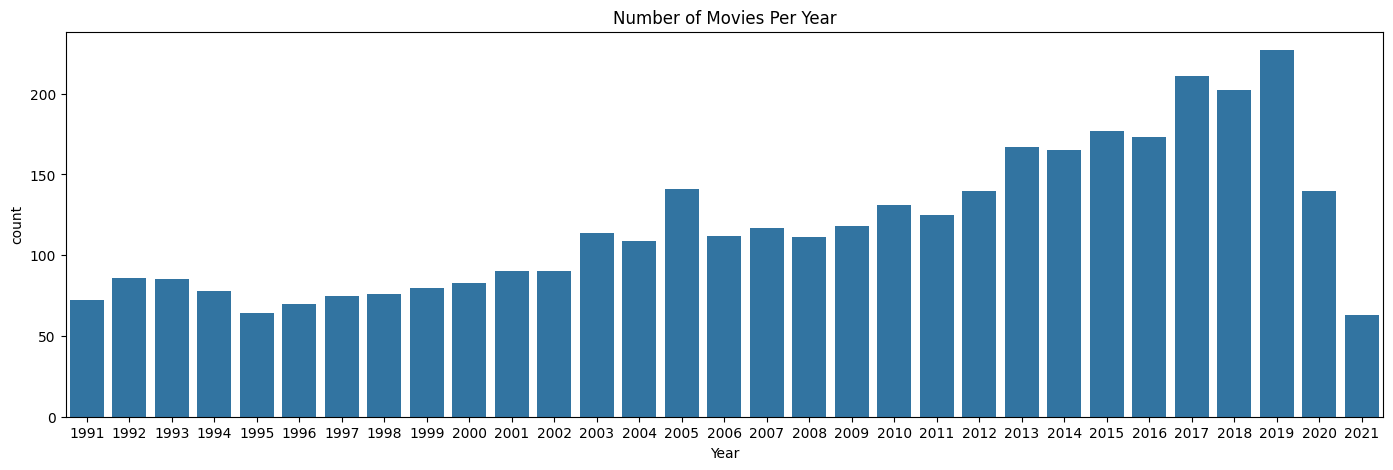

In [952]:
plt.figure(figsize=(17,5))
sns.countplot(x="Year",data=df)
plt.title("Number of Movies Per Year")
plt.show()

# Display Top 10 Highest Rated Movie Titles And its Directors

In [953]:
top_10_high_rated_movie=df.nlargest(10,'Rating')[['Rating','Name','Director']]
top_10_high_rated_movie.index

Index([8339, 5410, 5077, 6852, 14222, 1314, 1729, 5125, 8344, 11843], dtype='int64')

<Axes: xlabel='Rating', ylabel='Name'>

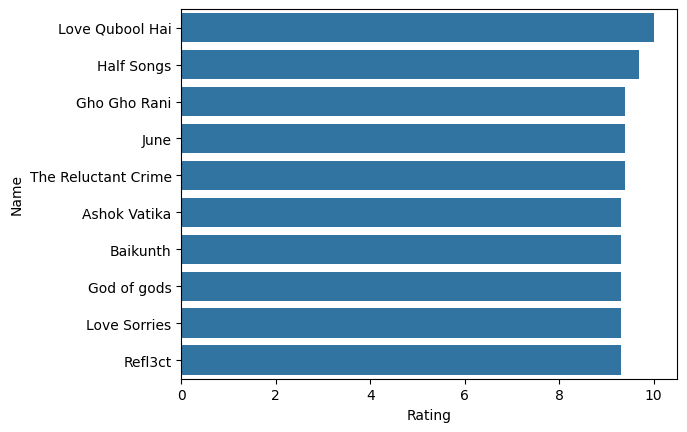

In [954]:
sns.barplot(data=top_10_high_rated_movie,x="Rating",y="Name")

# Does duration affect the rating?¶

<Axes: xlabel='Rating', ylabel='Duration'>

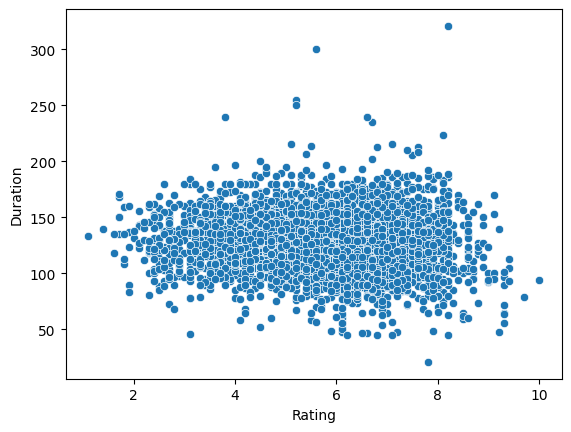

In [955]:
sns.scatterplot(data=df,x='Rating',y='Duration')

# multivariate analysis 

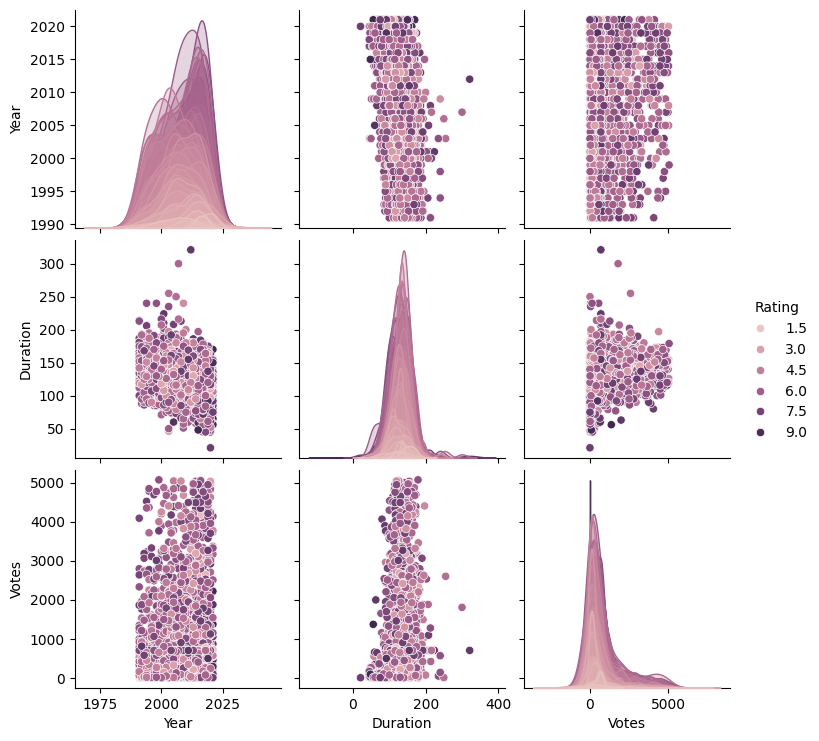

In [956]:
#pairplot
sns.pairplot(df,hue='Rating')

In [957]:
# !pip install wordcloud

In [982]:
df['Rating'].unique().sum()

456.7000000000001

In [959]:
#changin the name of movie using nlp
# Bag of word

In [961]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [962]:
bow_name=cv.fit_transform(df['Name'])

In [963]:
df['Name']=bow.toarray()

C:\Users\Acer\AppData\Local\Temp\ipykernel_4092\1788427517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name']=bow.toarray()


In [964]:
df['Name'].unique()

array([0, 1], dtype=int64)

In [965]:
#changin the name genre  into word
bow_genre=cv.fit_transform(df['Genre'])

In [966]:
df['Genre']=bow_genre.toarray()

C:\Users\Acer\AppData\Local\Temp\ipykernel_4092\3109371222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre']=bow_genre.toarray()


In [967]:
df['Genre'].unique()

array([0, 1], dtype=int64)

# model building 

In [968]:
final_df=pd.DataFrame(df,columns=['Name',"Year",'Duration','Genre','Votes','Rating'])
final_df

,Name,Year,Duration,Genre,Votes,Rating
1,0,2019,109,0,8.0,7.0
3,0,2019,110,0,35.0,4.4
5,0,1997,147,0,827.0,4.7
6,0,2005,142,0,1086.0,7.4
8,0,2012,82,0,326.0,5.6
...,...,...,...,...,...,...
15490,0,1998,157,1,268.0,4.3
15493,0,2015,115,0,408.0,6.1
15494,0,2001,153,0,1496.0,6.2
15505,0,1999,129,1,655.0,4.5


In [969]:
X=final_df.iloc[:,:-1]
X

,Name,Year,Duration,Genre,Votes
1,0,2019,109,0,8.0
3,0,2019,110,0,35.0
5,0,1997,147,0,827.0
6,0,2005,142,0,1086.0
8,0,2012,82,0,326.0
...,...,...,...,...,...
15490,0,1998,157,1,268.0
15493,0,2015,115,0,408.0
15494,0,2001,153,0,1496.0
15505,0,1999,129,1,655.0


In [970]:
y=final_df.iloc[:,-1]
y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15490    4.3
15493    6.1
15494    6.2
15505    4.5
15508    6.2
Name: Rating, Length: 3692, dtype: float64

In [971]:
from sklearn.model_selection import train_test_split

In [972]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=20)

# simple regresssion algo

In [973]:
from sklearn.linear_model import LinearRegression

In [974]:
lr=LinearRegression()

In [975]:
lr.fit(X_train,y_train)

LinearRegression()

In [976]:
y_pred=lr.predict(X_test)

In [977]:
from sklearn.metrics import  r2_score


In [978]:
r2_score(y_test,y_pred)

0.06355952623534145